 ## THIS NOTEBOOK TAKES AN TOY DATASET ON INCOME DISTRIBUTION AND CHECKS IF CENTRAL LIMIT THEOREM HOLDS TRUE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')

Number of datapoints in our population:  150000
Population mean is:  91252.798
Population standard deviation is:  24989.501


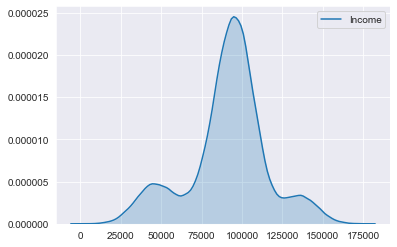

In [150]:
# reading the data and plotting the initial distribution
df = pd.read_csv(r'toy_dataset.csv')
sns.kdeplot(df['Income'],shade=True)
print("Number of datapoints in our population: ",df.shape[0])
# population mean
population_mean = np.round(df['Income'].mean(),3)
# population std
population_std = np.round(df['Income'].std(),3)
print("Population mean is: ",population_mean)
print("Population standard deviation is: ",population_std)

__Now Let's take 200 samples with each of size 100, and try to plot the distribution of their 'mean'__

In [27]:
def return_mean_of_samples(total_samples,element_in_each_sample):
    '''This function takes total samples and number of elements in each sample as input and generates sample means'''
    sample_with_n_elements_m_size = []
    for i in range(total_samples):
        sample = df.sample(element_in_each_sample).mean()['Income']
        sample_with_n_elements_m_size.append(sample)
    return (sample_with_n_elements_m_size)     

Total Samples:  200
Total elements in each sample:  100


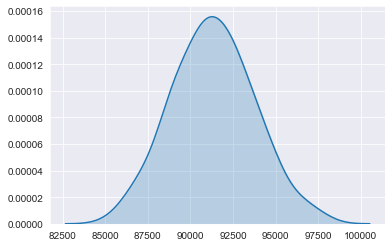

In [52]:
sample_means = return_mean_of_samples(200,100)
sns.kdeplot(sample_means,shade=True)
print("Total Samples: ",200)
print("Total elements in each sample: ",100)

__Here we create various sampling distributions by varying values of total samples and elements in each samples__

In [114]:
total_samples_list = [100,500]
elements_in_each_sample_list = [50,100,500]
mean_list = []
std_list = []
key_list = []
estimate_std_list = []
key=''
pop_mean = [population_mean]*6
pop_std = [population_std]*6
for tot in total_samples_list:
    for ele in elements_in_each_sample_list:
        key = '{}_samples_with_{}_elements_each'.format(tot,ele)
        key_list.append(key)
        mean_list.append(np.round(np.mean(return_mean_of_samples(tot,ele)),3))
        std_list.append(np.round(np.array(return_mean_of_samples(tot,ele)).std(),3))
        estimate_std_list.append(np.round(population_std/(np.sqrt(ele)),3))   
        

In [291]:
# we summarize the results of the sampling distributons obtained
df = pd.DataFrame(zip(key_list,pop_mean,mean_list,pop_std,estimate_std_list,std_list),columns=['Sample_Description','Population_Mean','Sample_Mean','Population_Standard_Deviation',"Pop_Std_Dev/"+u"\u221A"+"sample_size",'Sample_Standard_Deviation'])
df

,Sample_Description,Population_Mean,Sample_Mean,Population_Standard_Deviation,Pop_Std_Dev/√sample_size,Sample_Standard_Deviation
0,100_samples_with_50_elements_each,91252.798,91612.278,24989.501,3534.049,4048.615
1,100_samples_with_100_elements_each,91252.798,91765.923,24989.501,2498.950,2282.307
2,100_samples_with_500_elements_each,91252.798,91299.176,24989.501,1117.564,898.662
3,500_samples_with_50_elements_each,91252.798,91021.164,24989.501,3534.049,3677.492
4,500_samples_with_100_elements_each,91252.798,91387.952,24989.501,2498.950,2534.042
5,500_samples_with_500_elements_each,91252.798,91272.135,24989.501,1117.564,1083.365


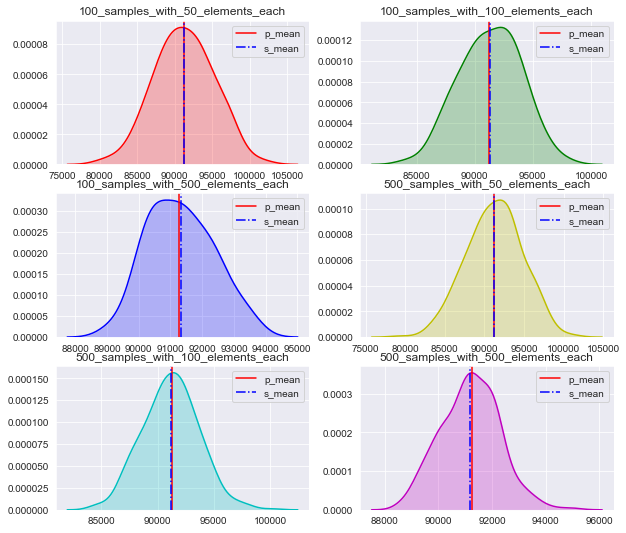

In [173]:
def plot_distribution(sample,population_mean,i,j,color,sampling_dist_type):
    '''This function takes the sampling distribution and population mean as input and plots them together'''
    sns.kdeplot(np.array(sample),color = color,ax = axs[i,j],shade=True)
    axs[i, j].axvline(population_mean, linestyle="-", color='r', label="p_mean")
    axs[i, j].axvline(np.array(sample).mean(), linestyle="-.", color='b', label="s_mean")
    axs[i, j].set_title(key)
    axs[i, j].legend()

colors = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (100, 100), (100, 500), (500, 50), (500, 100), (500, 500)]

total_samples_list = [100,500]
elements_in_each_sample_list = [50,100,500]

fig, axs = plt.subplots(3, 2,  figsize=(10, 9))
i = 0
for tot in total_samples_list:
    for ele in elements_in_each_sample_list:
        key = '{}_samples_with_{}_elements_each'.format(tot,ele)
        plot_distribution(return_mean_of_samples(tot,ele), population_mean , plt_grid[i][0], plt_grid[i][1] , colors[i], key)
        i = i + 1
plt.show()

__Here we check if confidence intervals contains the actual population mean__

In [283]:
sample_size = 50
standard_error = np.round(population_std/np.sqrt(sample_size),3)
def get_CI_percent(size):
    counter = 0
    lower_lim_ls = []
    upper_lim_ls = []
    sample_mean_ls = []
    pop_mean = [population_mean]*size
    status_ls = []
    for i in range(size):
        is_contains = False
        sample_mean = df.sample(50)['Income'].mean()
        sample_mean_ls.append(sample_mean)
        lower_lim = sample_mean - 2*standard_error
        lower_lim_ls.append(lower_lim)
        upper_lim = sample_mean + 2*standard_error
        upper_lim_ls.append(upper_lim)
        if (population_mean>=lower_lim)&(population_mean<=upper_lim):
            is_contains = True
            counter = counter + 1    
        status_ls.append(is_contains)
    print("{} % confidence Intervals contain the population mean".format(np.round(counter/size*100,2) ))
    return np.round(pd.DataFrame(zip(pop_mean,sample_mean_ls,lower_lim_ls,upper_lim_ls,status_ls),columns=['Population_Mean','Sample_Mean','Lower_Limit','Upper_Limit','Is_Present']),1)    

In [288]:
get_CI_percent(20)

95.0 % confidence Intervals contain the population mean


,Population_Mean,Sample_Mean,Lower_Limit,Upper_Limit,Is_Present
0,91252.8,94219.0,87150.9,101287.1,True
1,91252.8,88306.2,81238.1,95374.3,True
2,91252.8,91199.5,84131.4,98267.6,True
3,91252.8,92138.1,85070.0,99206.2,True
4,91252.8,86396.2,79328.1,93464.3,True
5,91252.8,96245.1,89177.0,103313.2,True
6,91252.8,90183.5,83115.4,97251.6,True
7,91252.8,89121.0,82052.9,96189.1,True
8,91252.8,93197.7,86129.6,100265.8,True
9,91252.8,92658.8,85590.7,99726.9,True
